# Classification - Support Vector Machine

## PRIYAM BANERJEE    1001529497

Citations :
https://code-examples.net/en/docs/scikit_learn/auto_examples/preprocessing/plot_scaling_importance#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py

http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
https://www.youtube.com/watch?v=N1vOgolbjSc

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html

http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html


### Load wine dataset from sklearn datasets.

In [1]:
# Load_wine dataset from sklearn
#Importing some of the following modules I'd need for my work ahead
from sklearn.datasets import load_wine  # Importing the load_wine dataset
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import itertools
import pandas as pd # Importing pandas to work with dataframe
import numpy as np # Importing numpy to work with scientific numerical analysis
''' Load wine dataset loading in next line'''
data = load_wine()  # Loading the load_wine over to dictionary variable called data
''' Creating pandas dataframe for the dataset '''
df = pd.DataFrame(data.data,columns=data.feature_names) # Converting the dictionary 'data' to a dataframe
y = data.target
df.head(10)    # Printing the first 10 rows of the dataframe

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


### Splitting the dataset 70% for training, and 30% for testing the classifier.

In [2]:
#Splitting dataset as 70% for training and 30% for testing 
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3) # Splitting up with testing data size as 30%
# Printing out the shapes of the Training and Test set
print("X-Train : ",X_train.shape) 
print("X-Test : ",X_test.shape)
print("Y-Train : ",y_train.shape)
print("Y-Test : ",y_test.shape)


X-Train :  (124, 13)
X-Test :  (54, 13)
Y-Train :  (124,)
Y-Test :  (54,)


## Preprocessing Data
### Doing Feature Selection using Principal Component Analysis (PCA) 
This results in better prediction accuracy and standardization of the dataset


Prediction accuracy for the normal test dataset with PCA
79.63%

Prediction accuracy for the standardized test dataset with PCA
92.59%


Principal Component 1 without scaling:
 [ 1.67056416e-03 -9.04030592e-04  1.87482607e-04 -4.48445728e-03
  1.74022013e-02  1.03006558e-03  1.60736433e-03 -1.30265826e-04
  6.22431102e-04  2.25312843e-03  1.83141549e-04  7.51571553e-04
  9.99831829e-01]

Principal Component 1 with scaling:
 [-0.1518516   0.2584731   0.01006117  0.24776869 -0.16095154 -0.38757518
 -0.41490031  0.29458859 -0.30504034  0.05924021 -0.29213132 -0.36659099
 -0.31194376]


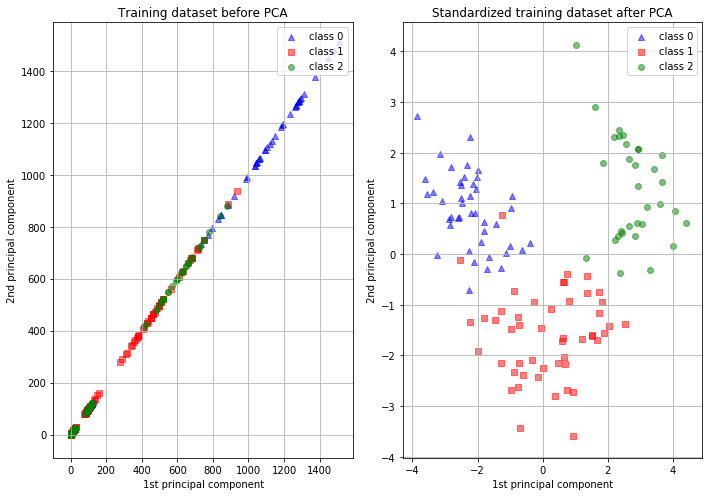

In [3]:
from __future__ import print_function
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
#print(__doc__)
RANDOM_STATE = 42
FIG_SIZE = (10, 7)

# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

print('Prediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))

# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

# Show first principal componenets
print('\nPrincipal Component 1 without scaling:\n', pca.components_[0])
print('\nPrincipal Component 1 with scaling:\n', pca_std.components_[0])

# Scale and use PCA on X_train data for visualization.
scaler = std_clf.named_steps['standardscaler']
X_train_std = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)

# For...loop to plot the graph for normal PCA Dataset (Non-Standardized)
for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train == l], X_train[y_train == l],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )
# For...loop to plot the graph for Standardized PCA Dataset
for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train == l,0], X_train_std[y_train == l,1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset before PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

### Selecting 2 attributes for training and testing our model.
Choosing 'alcohol' and 'malic acid' as the two attributes

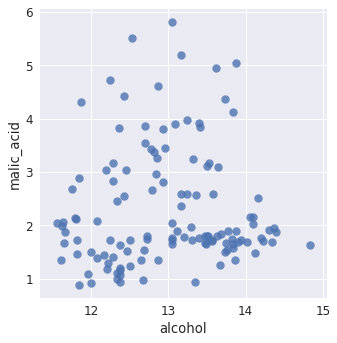

In [4]:
from sklearn import svm , datasets
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

X_train_alc_malicacid = X_train[['alcohol','malic_acid']].values # Selecting 2 attributes for training model
X_test_alc_malicacid = X_test[['alcohol','malic_acid']].values # Selecting 2 attributes for testing model

''' Visualizing the two attributes alcohol VS malic acid just to know the data better (Not really required)'''
ax = sns.lmplot('alcohol','malic_acid',data=X_train,palette='Set1',fit_reg=False,scatter_kws={"s":70})


### Training model and testing with Linear SVC using One-VS-One Method
### Also finding the accuracy score in %
### Note : Training and testing SVC using two attributes 'alcohol' and 'malic_acid'

In [5]:
''' SVC using Linear Kernel is shown below '''
model = svm.SVC(kernel='linear',decision_function_shape='ovo') # Using One-vs-One Multiple class comparison, so less sensitive to imbalance
model.fit(X_train_alc_malicacid,y_train) # Fitting standardized training data (considering only 2 attributes) into SVC Model
y_test_prediction_linearSVM = model.predict(X_test_alc_malicacid) # Predicting model outcome using standardized test data
print("Actual Class Label of Test Dataset    : ",y_test)
print("Predicted Class label of Test Dataset : ",y_test_prediction_linearSVM)
print("Accuracy Score (in %) for Linear SVM : ",(accuracy_score(y_test,y_test_prediction_linearSVM)*100))

Actual Class Label of Test Dataset    :  [2 2 2 0 2 1 2 0 0 1 0 1 2 2 1 1 1 2 0 1 0 2 0 1 0 1 2 2 1 2 1 0 1 0 2 0 2
 2 1 1 1 1 1 1 0 0 1 0 1 2 0 1 0 1]
Predicted Class label of Test Dataset :  [2 2 1 2 1 0 2 0 2 1 0 1 0 2 1 0 0 2 0 0 2 2 0 2 0 1 2 2 1 1 1 0 1 0 2 0 1
 2 1 1 1 1 2 1 0 0 1 0 1 2 0 1 1 1]
Accuracy Score (in %) for Linear SVM :  72.22222222222221


### Training model and testing with Non-Linear SVC (RBF) using One-Vs-One Method
### Also finding the accuracy score in %
### Note : Training and testing SVC using two attributes 'alcohol' and 'malic_acid'

In [6]:
''' SVC using Gaussian RBF Kernel is shown below '''
modelRBF = svm.SVC(kernel='rbf',decision_function_shape='ovo',C=1,gamma=2**-5) # Using RBF & One-vs-One Multiple class comparison, so less sensitive to imbalance
''' Choosing C=1 as std misclassification parameter & gamma=2^-5 to allow less complexity in data values and to avoid over-fitting'''
modelRBF.fit(X_train_alc_malicacid,y_train) # Fitting standardized training data (considering only 2 attributes) into SVC Model
y_test_prediction_RBFSVM = modelRBF.predict(X_test_alc_malicacid) # Predicting model outcome using standardized test data
print("Actual Class Label of Test Dataset    : ",y_test)
print("Predicted Class label of Test Dataset : ",y_test_prediction_RBFSVM)
print("Accuracy Score (in %) for Non-Linear SVM RBF : ",(accuracy_score(y_test,y_test_prediction_RBFSVM)*100))

Actual Class Label of Test Dataset    :  [2 2 2 0 2 1 2 0 0 1 0 1 2 2 1 1 1 2 0 1 0 2 0 1 0 1 2 2 1 2 1 0 1 0 2 0 2
 2 1 1 1 1 1 1 0 0 1 0 1 2 0 1 0 1]
Predicted Class label of Test Dataset :  [2 2 1 2 1 0 2 0 2 1 0 1 0 2 1 1 1 2 0 1 2 2 0 2 0 1 2 2 1 1 1 0 1 0 2 0 1
 2 1 1 1 1 2 1 0 0 1 0 1 2 0 1 1 1]
Accuracy Score (in %) for Non-Linear SVM RBF :  77.77777777777779


### Training model and testing with Non-Linear SVC (Polynomial=3) using One-Vs-One Method
### Also finding the accuracy score in %
### Note : Training and testing SVC using two attributes 'alcohol' and 'malic_acid'

In [7]:
''' SVC using Gaussian RBF Kernel is shown below '''
modelPoly = svm.SVC(kernel='poly',decision_function_shape='ovo',C=1,degree=3) # Using Polynomal Degree 3 & One-vs-One Multiple class comparison, so less sensitive to imbalance
''' Choosing C=1 as std misclassification parameter & degree of polynomial function = 3 '''
modelPoly.fit(X_train_alc_malicacid,y_train) # Fitting standardized training data (considering only 2 attributes) into SVC Model
y_test_prediction_SVMPoly = modelPoly.predict(X_test_alc_malicacid) # Predicting model outcome using standardized test data
print("Actual Class Label of Test Dataset    : ",y_test)
print("Predicted Class label of Test Dataset : ",y_test_prediction_SVMPoly)
print("Accuracy Score (in %) for Non-Linear SVM Polynomial Degree=3 : ",(accuracy_score(y_test,y_test_prediction_SVMPoly)*100))

Actual Class Label of Test Dataset    :  [2 2 2 0 2 1 2 0 0 1 0 1 2 2 1 1 1 2 0 1 0 2 0 1 0 1 2 2 1 2 1 0 1 0 2 0 2
 2 1 1 1 1 1 1 0 0 1 0 1 2 0 1 0 1]
Predicted Class label of Test Dataset :  [2 2 2 2 0 0 2 1 2 1 0 1 2 2 1 1 1 2 0 1 2 2 0 1 0 1 2 2 1 1 1 0 1 0 2 0 2
 2 1 1 1 1 2 1 0 0 1 0 1 2 0 1 1 1]
Accuracy Score (in %) for Non-Linear SVM Polynomial Degree=3 :  83.33333333333334


### Confusion Matrix for Linear SVM

Confusion matrix without normalization
[[12  1  3]
 [ 4 16  2]
 [ 1  4 11]]
Normalized confusion matrix
[[0.75 0.06 0.19]
 [0.18 0.73 0.09]
 [0.06 0.25 0.69]]


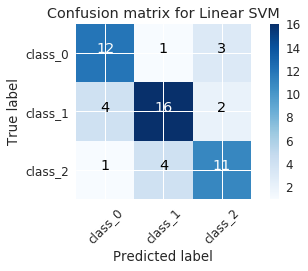

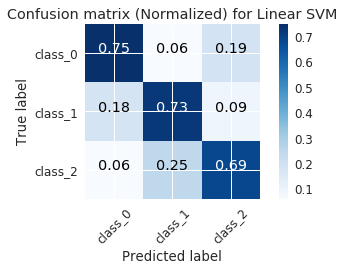

In [8]:
''' Following is the method for plotting the confusion matrix as a CMAP Plot (Matplotlib library module)'''
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # 'cm' is the computed confusion matrix being passed as parameter
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix without normalization')

    print(cm) # Printing out the computed confusion matrix
    ''' DEfining parameters for plt '''
    plt.imshow(cm, interpolation='nearest', cmap=cmap) 
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    ''' Using itertools module to  '''
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Computing the confusion matrix with respect to Gini Index prediction
cnf_matrix = confusion_matrix(y_test, y_test_prediction_linearSVM)
np.set_printoptions(precision=2)

# Plotting the non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=data.target_names,
                      title='Confusion matrix for Linear SVM')

# Plotting the normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=data.target_names, normalize=True,
                      title='Confusion matrix (Normalized) for Linear SVM')

plt.show()

### Confusion Matrix for Non-Linear SVM (Gaussian RBF)

Confusion matrix without normalization
[[12  1  3]
 [ 1 19  2]
 [ 1  4 11]]
Normalized confusion matrix
[[0.75 0.06 0.19]
 [0.05 0.86 0.09]
 [0.06 0.25 0.69]]


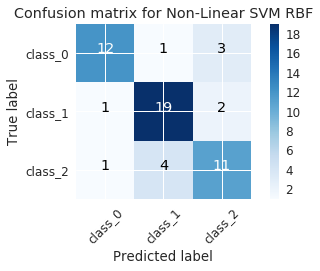

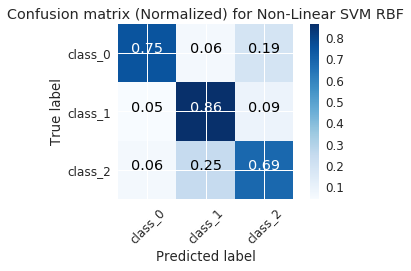

In [9]:
''' Following is the method for plotting the confusion matrix as a CMAP Plot (Matplotlib library module)'''
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # 'cm' is the computed confusion matrix being passed as parameter
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix without normalization')

    print(cm) # Printing out the computed confusion matrix
    ''' DEfining parameters for plt '''
    plt.imshow(cm, interpolation='nearest', cmap=cmap) 
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    ''' Using itertools module to  '''
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Computing the confusion matrix with respect to Gini Index prediction
cnf_matrix = confusion_matrix(y_test, y_test_prediction_RBFSVM)
np.set_printoptions(precision=2)

# Plotting the non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=data.target_names,
                      title='Confusion matrix for Non-Linear SVM RBF')

# Plotting the normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=data.target_names, normalize=True,
                      title='Confusion matrix (Normalized) for Non-Linear SVM RBF')

plt.show()

### Confusion Matrix for Non-Linear SVM (Polynomial Degree = 3)

Confusion matrix without normalization
[[11  2  3]
 [ 1 20  1]
 [ 1  1 14]]
Normalized confusion matrix
[[0.69 0.12 0.19]
 [0.05 0.91 0.05]
 [0.06 0.06 0.88]]


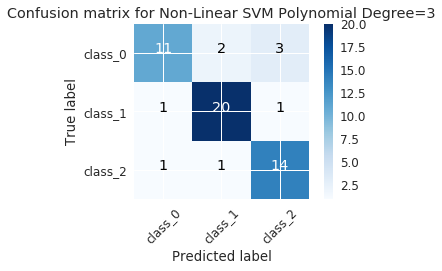

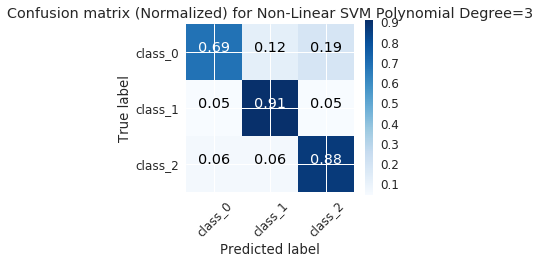

In [10]:
''' Following is the method for plotting the confusion matrix as a CMAP Plot (Matplotlib library module)'''
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # 'cm' is the computed confusion matrix being passed as parameter
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix without normalization')

    print(cm) # Printing out the computed confusion matrix
    ''' DEfining parameters for plt '''
    plt.imshow(cm, interpolation='nearest', cmap=cmap) 
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    ''' Using itertools module to  '''
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Computing the confusion matrix with respect to Gini Index prediction
cnf_matrix = confusion_matrix(y_test, y_test_prediction_SVMPoly)
np.set_printoptions(precision=2)

# Plotting the non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=data.target_names,
                      title='Confusion matrix for Non-Linear SVM Polynomial Degree=3')

# Plotting the normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=data.target_names, normalize=True,
                      title='Confusion matrix (Normalized) for Non-Linear SVM Polynomial Degree=3')

plt.show()

### Classification Report (Precision, Recall, F1 Score, Support) of Linear SVM and Non-Linear SVM

In [11]:
from sklearn.metrics import classification_report
print("Classification Report for Linear SVM using Confusion Matrix :\n",classification_report(y_test,y_test_prediction_linearSVM))
print("Classification Report for Non-Linear SVM (RBF) using Confusion Matrix :\n",classification_report(y_test,y_test_prediction_RBFSVM))
print("Classification Report for Non-Linear SVM (Poly Degree=3) using Confusion Matrix :\n",classification_report(y_test,y_test_prediction_SVMPoly))

Classification Report for Linear SVM using Confusion Matrix :
              precision    recall  f1-score   support

          0       0.71      0.75      0.73        16
          1       0.76      0.73      0.74        22
          2       0.69      0.69      0.69        16

avg / total       0.72      0.72      0.72        54

Classification Report for Non-Linear SVM (RBF) using Confusion Matrix :
              precision    recall  f1-score   support

          0       0.86      0.75      0.80        16
          1       0.79      0.86      0.83        22
          2       0.69      0.69      0.69        16

avg / total       0.78      0.78      0.78        54

Classification Report for Non-Linear SVM (Poly Degree=3) using Confusion Matrix :
              precision    recall  f1-score   support

          0       0.85      0.69      0.76        16
          1       0.87      0.91      0.89        22
          2       0.78      0.88      0.82        16

avg / total       0.84      0.8

### Visualization of SVM in 2D
### Showing all four SVMs in a grid view

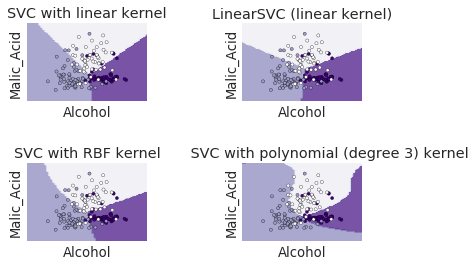

In [12]:
''' The method below helps in creating the mesh of points to plot '''
def make_meshgrid(x, y, h=.1):
    """Creating a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

''' The method below is used to draw the hyperplanes'''
def plot_contours(ax, clf, xx, yy, **params):
    """Plotting the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
wine = datasets.load_wine()
# Taking the first two features into consideration 'Alcohol' and 'Malic Acid'
X = wine.data[:, :2]
y = wine.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=2**-5, C=C,decision_function_shape='ovo'),
          svm.SVC(kernel='poly', degree=3, C=C,decision_function_shape='ovo')) #Creates tuples for the 4 types of SVMs
models = (clf.fit(X, y) for clf in models) # Fits in training dataset for the 4 SVMs

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          '            SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.8, hspace=0.8)


X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.Purples_r, alpha=0.7)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.Purples_r, s=10, edgecolors='k',label=plt.cm.Purples_r)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Alcohol')
    ax.set_ylabel('Malic_Acid')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()
